# Penguin Dataset Workbook

In [2]:
 !wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv


--2022-03-12 14:02:16--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13478 (13K) [text/plain]
Saving to: ‘penguins.csv.4’

penguins.csv.4      100%[===================>]  13.16K  --.-KB/s    in 0.005s  

2022-03-12 14:02:16 (2.56 MB/s) - ‘penguins.csv.4’ saved [13478/13478]



In [5]:
df = pd.read_csv("penguins.csv.4")
print(df.isna().sum())  

df.dropna(inplace=True) 
print(df.isna().sum())  
# removed NAN values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Initial Look at Data

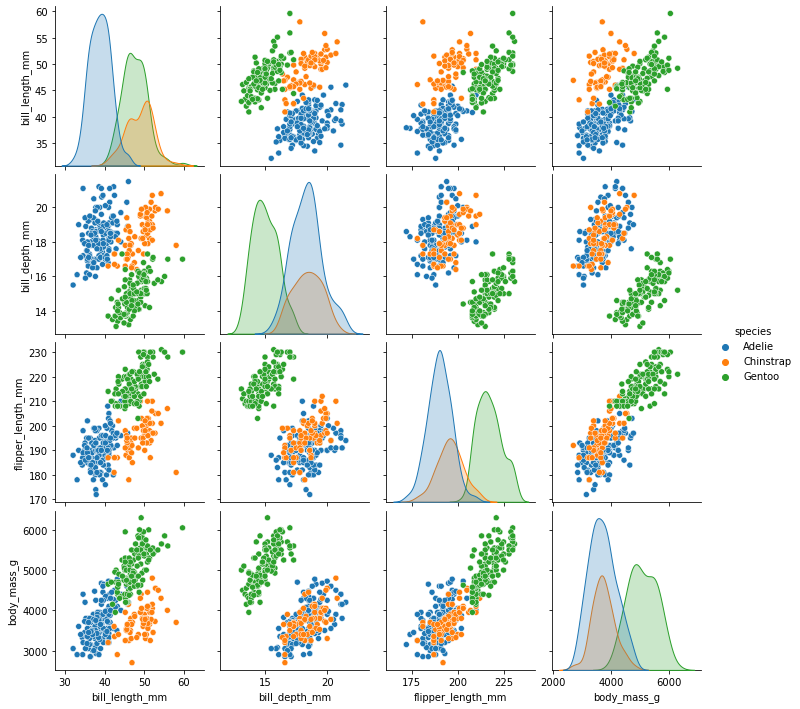

In [6]:
# using seaborn package

sns.pairplot(data=df, hue="species")

In [7]:
print("===============================")
print("Pearson correlation")
print("===============================")
print(df.corr(method="pearson"))
print()
print("===============================")
print("Spearman correlation")
print("===============================")
print(df.corr(method="spearman"))

Pearson correlation
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  

Spearman correlation
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.213859           0.669754   
bill_depth_mm           -0.213859       1.000000          -0.517317   
flipper_length_mm        0.669754      -0.517317           1.000000   
body_mass_g              0.576480      -0.429283           0.840390   

                   body_mass_g  
bill_length_mm        0.576480  
bill_depth_mm  

From this data, I believe I can use bill_length_mm and flipper_length_mm to predict the Penguin's body mass.

## Let's look at Gentoo Penguin First

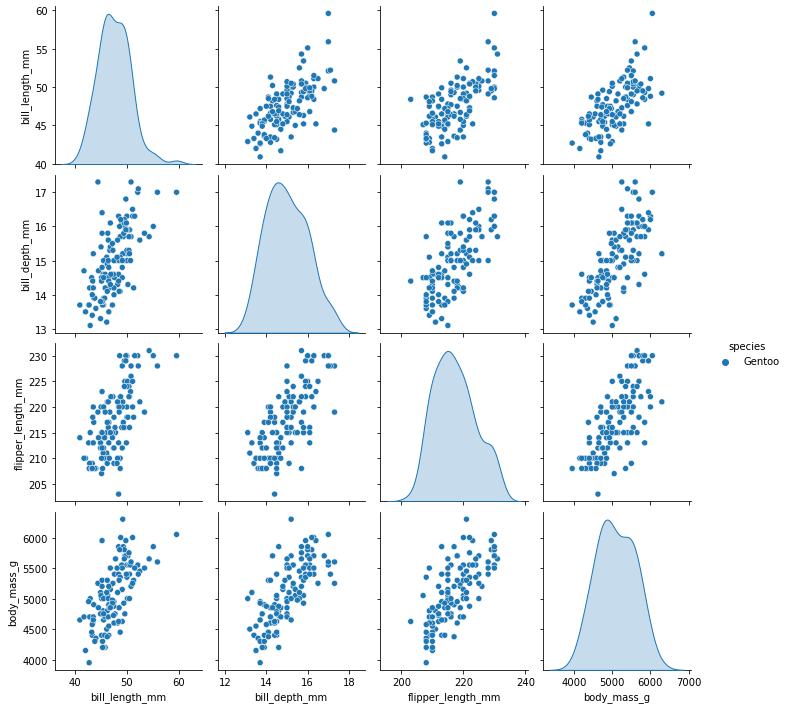

In [8]:
Gentoo_data = df.loc[df["species"] == "Gentoo"]
Gentoo_data.dropna()
sns.pairplot(data=Gentoo_data, hue="species")

In [9]:
print("===============================")
print("Pearson correlation ($r$)")
print("===============================")
print(Gentoo_data.corr(method="pearson"))
print()
print("===============================")
print("Spearman correlation ($p$)")
print("===============================")
print(Gentoo_data.corr(method="spearman"))

Pearson correlation ($r$)
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000       0.654023           0.664205   
bill_depth_mm            0.654023       1.000000           0.710642   
flipper_length_mm        0.664205       0.710642           1.000000   
body_mass_g              0.666730       0.722967           0.711305   

                   body_mass_g  
bill_length_mm        0.666730  
bill_depth_mm         0.722967  
flipper_length_mm     0.711305  
body_mass_g           1.000000  

Spearman correlation ($p$)
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000       0.652378           0.659397   
bill_depth_mm            0.652378       1.000000           0.702879   
flipper_length_mm        0.659397       0.702879           1.000000   
body_mass_g              0.683958       0.759518           0.726595   

                   body_mass_g  
bill_length_mm        0.683958  
bil

# LINEAR REGRESSION
TBD
Do for Flipper Length v/s Body Mass | Bill Depth v/s Body Mass

In [ ]:
# Flipper length v/s body mass

In [13]:
from sklearn import linear_model

lin_regr = linear_model.LinearRegression() # initialise class
"""
input_var = setosa_data[['sepal.length', 'sepal.width']].values
output_var = setosa_data['petal.length'].values
"""

input_var = Gentoo_data[['body_mass_g', "bill_length_mm"]].values
output_var = Gentoo_data['flipper_length_mm'].values


lin_regr.fit(input_var, output_var)        # do multilinear fitting

# the lin_regr is now your model of y = c + \Sum a_i * X_i, pull out the coefficients a_i
s, c = lin_regr.coef_, lin_regr.intercept_  # (s, c) interpretation as before, see lec03 notebook
                                            # the s ar the (linear) trends
print(f"suggested model is y = {c:.4f} + {s[0]:.4f} * x_1 + {s[1]:.4f} * x_2")
print(f"   r^2 value is {lin_regr.score(input_var, output_var):.4f}")  # suggestion of fit

ind = 0
pred_out = lin_regr.predict([[input_var[ind, 0], input_var[ind, 1]]])
print(f"input1 = {input_var[ind, 0]}, input2 = {input_var[ind, 1]}, actual value = {output_var[ind]}, pred value = {pred_out[0]}")

suggested model is y = 150.4263 + 0.0063 * x_1 + 0.7250 * x_2
   r^2 value is 0.5709
input1 = 4500.0, input2 = 46.1, actual value = 211.0, pred value = 212.41084226913057


In [14]:
Gentoo_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We want to **predict** body mass using Bill depth and Flipper Length  

In [ ]:
line_of_best_fit_lin = s * t + c


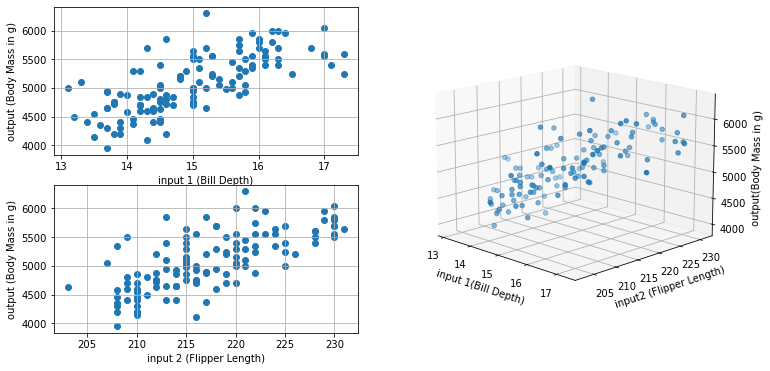

In [58]:
input_var = Gentoo_data[['bill_depth_mm', 'flipper_length_mm']].values
output_var = Gentoo_data['body_mass_g'].values

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 2, 1)
ax.scatter(input_var[:, 0], output_var) # input_var[:,0] is the first input var ie Bill depth
ax.set_xlabel(r"input 1 (Bill Depth)"); ax.set_ylabel(r"output (Body Mass in g)"); ax.grid()

ax = plt.subplot(2, 2, 3)
ax.scatter(input_var[:, 1], output_var)
ax.set_xlabel(r"input 2 (Flipper Length)"); ax.set_ylabel(r"output (Body Mass in g)"); ax.grid()

ax = plt.subplot2grid([2, 2], [0, 1], rowspan=2, colspan=1, projection="3d")
ax.scatter(input_var[:, 0], input_var[:, 1], output_var)
ax.set_xlabel(r"input 1(Bill Depth)"); ax.set_ylabel(r"input2 (Flipper Length)"); ax.set_zlabel(r"output(Body Mass in g) "); ax.grid()
ax.view_init(15, -45)


In [57]:
## Okay Im really not sure what is happening here 

# Maybe provides a solution 
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [65]:
from sklearn import linear_model # use sk linear model to fit and then predict

lin_regr = linear_model.LinearRegression() # initialise class

input_var = Gentoo_data[['bill_depth_mm', 'flipper_length_mm']].values
output_var = Gentoo_data['body_mass_g'].values

lin_regr.fit(input_var, output_var)        # do multilinear fitting

# the lin_regr is now your model of y = c + \Sum a_i * X_i, pull out the coefficients a_i
s, c = lin_regr.coef_, lin_regr.intercept_  # (s, c) interpretation as before, see lec03 notebook
                                            # the s ar the (linear) trends
print(f"suggested model is y = {c:.4f} + {s[0]:.4f} * x_1 + {s[1]:.4f} * x_2")
print(f"   r^2 value is {lin_regr.score(input_var, output_var):.4f}")  # suggestion of fit



ind = 0
pred_out = lin_regr.predict([[input_var[ind, 0], input_var[ind, 1]]])
print(f"input1 = {input_var[ind, 0]}, input2 = {input_var[ind, 1]}, actual value = {output_var[ind]}, pred value = {pred_out[0]}")


suggested model is y = -4860.2931 + 223.4635 * x_1 + 30.3888 * x_2
   r^2 value is 0.6015
input1 = 13.2, input2 = 211.0, actual value = 4500.0, pred value = 4501.470495645388


In [71]:
Gentoo_data_mod = Gentoo_data.copy(deep=True)

# make a prediction
N = input_var.shape[0]
pred_out = np.zeros(N)
for ind in range(N):
    pred_out[ind] = lin_regr.predict([[input_var[ind, 0], input_var[ind, 1]]])[0] # this is an array of predicted values

# now have an array of predicted values, put this into pandas to read
# syntax: df["whatever you want to call the column"] = data_array
Gentoo_data_mod["pred.body.mass"] = pred_out
Gentoo_data_mod["signed mismatches"] = pred_out - Gentoo_data_mod["body_mass_g"] # regular error, predicted - actual 
Gentoo_data_mod["squared mismatch"] = (pred_out - Gentoo_data_mod["body_mass_g"]) ** 2 # squared error ~ (pred - actual) **2
Gentoo_data_mod.sample(10).style.set_properties(**{'background-color': 'pink'}, 
                                     subset=['pred.body.mass', 'signed mismatches', 'squared mismatch'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,pred.body.mass,signed mismatches,squared mismatch
241,Gentoo,Biscoe,45.100000,14.500000,215.000000,5000.000000,FEMALE,4913.528377,-86.471623,7477.341639
305,Gentoo,Biscoe,50.800000,17.300000,228.000000,5600.000000,MALE,5934.281045,334.281045,111743.816915
294,Gentoo,Biscoe,46.400000,15.000000,216.000000,4700.000000,FEMALE,5055.648954,355.648954,126486.178660
237,Gentoo,Biscoe,49.200000,15.200000,221.000000,6300.000000,MALE,5252.285860,-1047.714140,1097704.918526
231,Gentoo,Biscoe,49.000000,16.100000,216.000000,5550.000000,MALE,5301.458772,-248.541228,61772.742197
283,Gentoo,Biscoe,54.300000,15.700000,231.000000,5650.000000,MALE,5667.906019,17.906019,320.625532
277,Gentoo,Biscoe,45.500000,15.000000,220.000000,5000.000000,MALE,5177.204324,177.204324,31401.372386
257,Gentoo,Biscoe,44.400000,17.300000,219.000000,5250.000000,MALE,5660.781463,410.781463,168741.410542
222,Gentoo,Biscoe,48.700000,14.100000,210.000000,4450.000000,FEMALE,4672.198777,222.198777,49372.296306
284,Gentoo,Biscoe,45.800000,14.200000,219.000000,4700.000000,FEMALE,4968.044705,268.044705,71847.963965


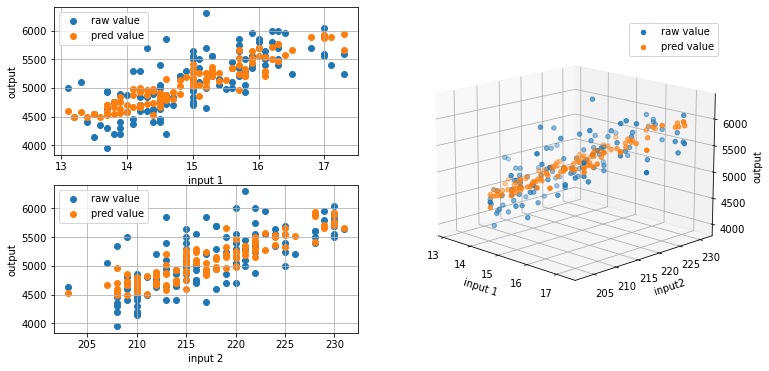

In [72]:
# Plotting the expected with the actual value obtained 

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(2, 2, 1)
ax.scatter(input_var[:, 0], output_var, label="raw value")
ax.scatter(input_var[:, 0], Gentoo_data_mod["pred.body.mass"], label="pred value")
ax.set_xlabel(r"input 1"); ax.set_ylabel(r"output"); ax.grid(); ax.legend();

ax = plt.subplot(2, 2, 3)
ax.scatter(input_var[:, 1], output_var, label="raw value")
ax.scatter(input_var[:, 1], Gentoo_data_mod["pred.body.mass"], label="pred value")
ax.set_xlabel(r"input 2"); ax.set_ylabel(r"output"); ax.grid(); ax.legend();

ax = plt.subplot2grid([2, 2], [0, 1], rowspan=2, colspan=1, projection="3d")
ax.scatter(input_var[:, 0], input_var[:, 1], output_var, label="raw value")
ax.scatter(input_var[:, 0], input_var[:, 1], Gentoo_data_mod["pred.body.mass"], label="pred value")
ax.set_xlabel(r"input 1"); ax.set_ylabel(r"input2"); ax.set_zlabel(r"output"); ax.grid(); ax.legend();
ax.view_init(15, -45)

# Principal Component Analysis 

pca components    = [[-0.10696334 -0.99426297]
 [ 0.99426297 -0.10696334]]
pca var explained = [43.86431128  0.47577703]


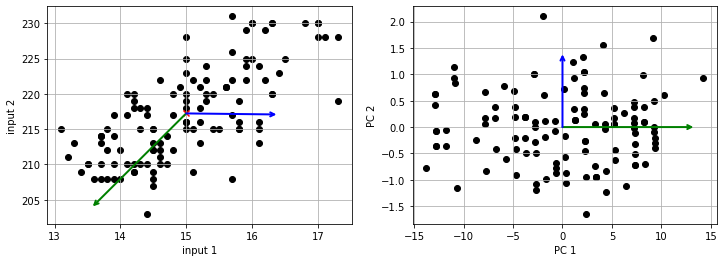

In [64]:
input_var = Gentoo_data[['bill_depth_mm', 'flipper_length_mm']].values
output_var = Gentoo_data['body_mass_g'].values

from sklearn.decomposition import PCA # importing the package PCA
pca = PCA(n_components=2)   # define a PCA object with two PCAs (can choose more for larger data)
pca.fit(input_var)

print(f"pca components    = {pca.components_}") # what is PCA.components(??)
print(f"pca var explained = {pca.explained_variance_}")  # variance explained by the inputs 

# first plot 
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 2, 1)
ax.scatter(input_var[:, 0], input_var[:, 1], c='k')
# input_var[:,0 ~ sepal length, :,1 is petal length]
ax.scatter(pca.mean_[0], pca.mean_[1], c='r', marker='x')
ax.annotate("", pca.mean_ + pca.components_[0] * 2 * np.sqrt(pca.explained_variance_[0]), pca.mean_,
            arrowprops=dict(color="green", arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
ax.annotate("", pca.mean_ + pca.components_[1] * 2 * np.sqrt(pca.explained_variance_[1]), pca.mean_,
            arrowprops=dict(color="blue", arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
ax.set_xlabel(r"input 1"); ax.set_ylabel(r"input 2"); ax.grid()

input_pca = pca.transform(input_var)


#this is the second plot 
ax = plt.subplot(1, 2, 2)
ax.scatter(input_pca[:, 0], input_pca[:, 1], c="k")
ax.annotate("", [2 * np.sqrt(pca.explained_variance_[0]), 0], [0, 0],
            arrowprops=dict(color="green", arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
ax.annotate("", [0, 2 * np.sqrt(pca.explained_variance_[1])], [0, 0],
            arrowprops=dict(color="blue", arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
ax.set_xlabel(r"PC 1"); ax.set_ylabel(r"PC 2"); ax.grid()


pca components    = [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
pca var explained = [1.72513916 0.29181   ]
[-1.96624643  2.3150539  -1.42591227  0.22891395 -0.59869782 -1.85802067
 -0.9579935   0.40876045 -2.03786717  0.04946478 -1.28267079  0.66141968
 -1.28267079 -0.74233663 -1.06582193  0.48117585 -1.85802067  0.55239925
 -1.24566843  0.58820962 -0.41924865 -0.59869782 -0.81435469  0.33753704
 -1.60695076 -0.16658942 -0.23860749 -1.28187613  0.51658888  0.73224575
 -1.46172263 -1.4613253   2.81918037  0.15649855  1.23676955 -1.39049923
  1.84912178 -2.00165947 -0.48928007 -1.9296414   1.55985752 -1.71398453
 -0.13077906  1.16435415 -0.81514935 -1.5699484   1.48783946 -1.67857149
  0.33753704 -1.3538942  -0.34762792 -1.20985807  0.83967686 -0.45505902
  0.58860695 -1.78560527  0.30053468 -1.35349687  0.94790262 -1.85762333
  0.33634505 -1.13863466  1.99077393 -0.38343829  2.67514423  2.1352074
 -0.27560985  0.62401999 -0.13077906  0.84047152  0.84047152 -0.16698675
 -0.13

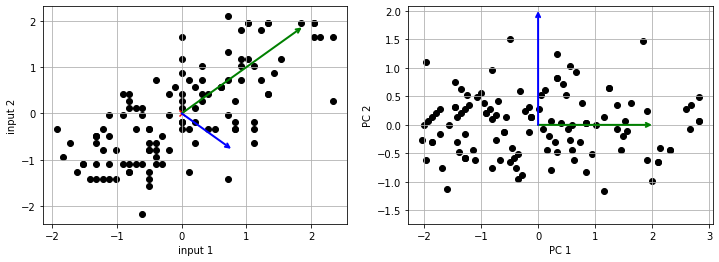

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input_var)

pca = PCA(n_components=2)   # define a PCA object with two PCAs (can choose more for larger data)
pca.fit(input_scaled)

print(f"pca components    = {pca.components_}") # what is PCA.components(??)
print(f"pca var explained = {pca.explained_variance_}")

# first plot 
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 2, 1)
ax.scatter(input_scaled[:, 0], input_scaled[:, 1], c='k')
# input_var[:,0 ~ sepal length, :,1 is petal length]
ax.scatter(pca.mean_[0], pca.mean_[1], c='r', marker='x')
ax.annotate("", pca.mean_ + pca.components_[0] * 2 * np.sqrt(pca.explained_variance_[0]), pca.mean_,
            arrowprops=dict(color="green", arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
ax.annotate("", pca.mean_ + pca.components_[1] * 2 * np.sqrt(pca.explained_variance_[1]), pca.mean_,
            arrowprops=dict(color="blue", arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
ax.set_xlabel(r"input 1"); ax.set_ylabel(r"input 2"); ax.grid()

input_pca = pca.transform(input_scaled)


#this is the second plot 
ax = plt.subplot(1, 2, 2)
ax.scatter(input_pca[:, 0], input_pca[:, 1], c="k")
ax.annotate("", [2, 0], [0, 0],
            arrowprops=dict(color="green", arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
ax.annotate("", [0, 2], [0, 0],
            arrowprops=dict(color="blue", arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
ax.set_xlabel(r"PC 1"); ax.set_ylabel(r"PC 2"); ax.grid(); ax.axis("equal");

print(input_pca[:, 0])
print(input_scaled[:,0])

In [20]:
# Culmen Length (mm) vs. Body Mass (g)
trace1 = go.Scatter(
x=adelie_df[“Culmen Length (mm)”],
y=adelie_df[“Body Mass (g)”],
text=adelie_df[“Species”],
mode=”markers”,
marker=dict(size=10, symbol=”circle”, line=dict(color=”rgb(0,0,0)”, width=0.5)),
marker_color=adelie_df[“Color”],
name=”Adelie Penguin”,
)
trace2 = go.Scatter(
x=gentoo_df[“Culmen Length (mm)”],
y=gentoo_df[“Body Mass (g)”],
text=gentoo_df[“Species”],
mode=”markers”,
marker=dict(size=10, symbol=”square”, line=dict(color=”rgb(0,0,0)”, width=0.5)),
marker_color=gentoo_df[“Color”],
name=”Gentoo penguin”,
)
trace3 = go.Scatter(
x=chinstrap_df[“Culmen Length (mm)”],
y=chinstrap_df[“Body Mass (g)”],
text=chinstrap_df[“Species”],
mode=”markers”,
marker=dict(
size=12, symbol=”triangle-up”, line=dict(color=”rgb(0,0,0)”, width=0.5)
),
marker_color=chinstrap_df[“Color”],
name=”Chinstrap penguin”,
)
data = [trace1, trace2, trace3]
layout = dict(
title=”<b>Culmen Length (mm) vs. Body Mass (g)</b>”,
showlegend=True,
xaxis=dict(title=”Culmen Length (mm)”),
yaxis=dict(title=”Body Mass (g)”),
plot_bgcolor=”rgba(0,0,0,0)”,
paper_bgcolor=”rgba(0,0,0,0)”,
)
fig = dict(data=data, layout=layout)
iplot(fig)

SyntaxError: invalid character '“' (U+201C) (1181064831.py, line 3)